In [1]:
#import os pacotes utilizados
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#exibindo todas as colunas
pd.set_option('display.max_columns', None)

In [2]:
#importando base já tratada
dados = pd.read_json('dados_notas_col.json')
print(dados.id.nunique())
print(dados.shape)
dados.head(3)

6395
(6395, 34)


,LnguaPortuguesaeLiteraturaI90H,LnguaPortuguesaeLiteraturaII90H,MatemticaI120H,MatemticaII90H,ano_letivo__ano,ano_letivo__ano_matricula_periodo,cep,classe,data,descricao,descricao_area_residencial,descricao_companhia_domiciliar,descricao_encaminhamento,descricao_historico,descricao_historico_disciplina,descricao_imovel,descricao_mae_escolaridade,descricao_pai_escolaridade,descricao_raca,descricao_responsavel_escolaridade,descricao_responsavel_financeiro,descricao_situacao_matricula_periodo,descricao_trabalho_responsavel,id,media_final,nome_escola_ensino_fundamental,percentual_frequencia,pessoa_fisica__nascimento_data,pessoa_fisica__sexo,professores,qnt_pc,qtd_pessoas_domicilio,renda_bruta_familiar,sigla
0,86,-1,87,-1,2016,2016,59067-400,1,05/05/2017,Matriculado,Urbana,Pais,Diálogo com professor(a),Técnico de Nível Médio em Edificações,Língua Portuguesa e Literatura I(90H),Financiado,Pós graduação incompleto,Pós graduação completo,Parda,Pós graduação completo,Pai,Aprovado,Serviço público,496915657473,86,Complexo Educacional Contemporâneo,85.0,06/12/2001,M,[1521],NaN,4,9000.0,CNAT
100002,69,-1,5,-1,2015,2016,59795-000,1,None,Matriculado,Urbana,Mãe,None,"Técnico de Nivel Médio em Agropecuária, na For...",Língua Portuguesa e Literatura I(90H),Alugado,Ensino fundamental incompleto,Ensino médio completo,Branca,Ensino médio completo,Pai,Dependência,Autônomo,458905053917,69,Escola Estadual António Francisco,92.0,16/12/1999,M,"[2688, 3538, 1222]",0.0,3,500.0,AP
100021,83,-1,77,-1,2016,2016,59200-000,1,None,Matriculado,Urbana,Pais,None,Técnico de Nivel Médio Informática,Língua Portuguesa e Literatura I(90H),Alugado,Ensino médio completo,Ensino médio incompleto,Branca,Ensino médio completo,Pai,Aprovado,Autônomo,496533683389,83,IESC,99.0,01/06/2000,F,"[1592, 3388]",0.0,7,2500.0,SC


In [3]:
#removendo colunas que explodem a quantidade de atributos quando binarizados
del dados['descricao_historico_disciplina']
del dados['professores']
del dados['id']
del dados['media_final']
del dados['percentual_frequencia']
del dados['nome_escola_ensino_fundamental']
del dados['qnt_pc']

#tentar colocar novamente
del dados['cep']
del dados['data']
del dados['pessoa_fisica__nascimento_data']

#descricao_encaminhamento colocar booleano

#dados
dados2 = dados.copy() 
 
#dados que fazem a indicação se o aluno foi evadido ou não
del dados['descricao']
del dados['descricao_situacao_matricula_periodo']

In [4]:
#configura os dados de entrada e saída
y = dados.classe
X = dados

del X['classe']
X.shape

(6395, 21)

In [17]:
#binazira os dados devido aos atributos categoricos 
dados_dummies = pd.get_dummies(X, drop_first=False)
dados_dummies.shape

(6395, 161)

In [18]:
#remove alguns dados inconistentes
dados_clean = dados_dummies.replace([np.inf, -np.inf], np.nan)
dados_clean = dados_clean.dropna(axis=1, how='all')
dados_dummies.head(2)

,LnguaPortuguesaeLiteraturaI90H,LnguaPortuguesaeLiteraturaII90H,MatemticaI120H,MatemticaII90H,ano_letivo__ano,ano_letivo__ano_matricula_periodo,qtd_pessoas_domicilio,renda_bruta_familiar,descricao_area_residencial_Comunidade Indígena,descricao_area_residencial_Comunidade Quilombola,descricao_area_residencial_Não informado,descricao_area_residencial_Rural,descricao_area_residencial_Urbana,descricao_companhia_domiciliar_Cônjuge,descricao_companhia_domiciliar_Mãe,descricao_companhia_domiciliar_Não informado,descricao_companhia_domiciliar_Outros,descricao_companhia_domiciliar_Pai,descricao_companhia_domiciliar_Pais,descricao_companhia_domiciliar_Parente(s) ou amigo(s),descricao_companhia_domiciliar_Sozinho(a),descricao_encaminhamento_Atendimento domiciliar,descricao_encaminhamento_Contato telefônico com os pais ou responsáveis,descricao_encaminhamento_Diálogo com aluno(a) e professor(a),descricao_encaminhamento_Diálogo com o(s) aluno(s),descricao_encaminhamento_Diálogo com pais ou responsáveis,descricao_encaminhamento_Diálogo com professor(a),descricao_encaminhamento_Elaboração de rotina de estudos,descricao_encaminhamento_Envio de Telegrama ou e-mail aos pais ou responsáveis,descricao_encaminhamento_Orientação para cancelamento de matrícula​,descricao_encaminhamento_Orientação para trancamento compulsório de matrícula,descricao_encaminhamento_Orientação para transferência de Curso/Campus,descricao_encaminhamento_Solicitação de Aplicação/Registro de medida disciplinar,descricao_encaminhamento_Solicitação de atendimento da Assistência Social,descricao_encaminhamento_Solicitação de atendimento da Psicologia,descricao_encaminhamento_Solicitação de atendimento do Setor de saúde,descricao_encaminhamento_Solicitação de comparecimento dos pais ou responsáveis à escola,descricao_historico_Técnico de Nivel Médio Informática,"descricao_historico_Técnico de Nivel Médio em Agropecuária, na Forma Integrada",descricao_historico_Técnico de Nivel Médio em Biocombustíveis,descricao_historico_Técnico de Nivel Médio em Equipamentos Biomédicos,descricao_historico_Técnico de Nivel Médio em Informática,descricao_historico_Técnico de Nível Médio em Administração,descricao_historico_Técnico de Nível Médio em Agroecologia,descricao_historico_Técnico de Nível Médio em Alimentos,descricao_historico_Técnico de Nível Médio em Apicultura,descricao_historico_Técnico de Nível Médio em Comércio,descricao_historico_Técnico de Nível Médio em Controle Ambiental,descricao_historico_Técnico de Nível Médio em Edificações,descricao_historico_Técnico de Nível Médio em Eletromecânica,descricao_historico_Técnico de Nível Médio em Eletrotécnica,descricao_historico_Técnico de Nível Médio em Eletrônica,descricao_historico_Técnico de Nível Médio em Eventos,descricao_historico_Técnico de Nível Médio em Geologia,descricao_historico_Técnico de Nível Médio em Informática,descricao_historico_Técnico de Nível Médio em Informática para Internet,descricao_historico_Técnico de Nível Médio em Lazer,descricao_historico_Técnico de Nível Médio em Logística,descricao_historico_Técnico de Nível Médio em Manutenção e Suporte em Informática,descricao_historico_Técnico de Nível Médio em Mecatrônica,descricao_historico_Técnico de Nível Médio em Mecânica,descricao_historico_Técnico de Nível Médio em Meio Ambiente,descricao_historico_Técnico de Nível Médio em Mineração,descricao_historico_Técnico de Nível Médio em Multimídia,descricao_historico_Técnico de Nível Médio em Química,"descricao_historico_Técnico de Nível Médio em Química, na Forma Integrado",descricao_historico_Técnico de Nível Médio em Recursos Pesqueiros,descricao_historico_Técnico de Nível Médio em Refrigeração e Climatização,descricao_historico_Técnico de Nível Médio em Têxtil,descricao_historico_Técnico de Nível Médio em Vestuário,descricao_historico_Técnico em Programação de Jogos Digitais,descricao_imovel_Alugado,descricao_imovel_Cedido ou Emprestado,descricao_imovel_Financiado,descricao_imovel_Não informado,descricao_imovel_Outr

In [7]:
#ESCALONAMENTO DE DADOS
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler

#dados_clean3 = StandardScaler().fit_transform(dados_clean)
#dados_clean3 = MinMaxScaler().fit_transform(dados_clean)
#dados_clean3 = RobustScaler(quantile_range=(25, 75)).fit_transform(dados_clean)

In [42]:
#SELECIONANDO MELHOR MODEL RF
from sklearn.model_selection import GridSearchCV

param_grid = [    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},    
                  {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},  ]

forest_reg = RandomForestClassifier()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,                           
                           scoring='neg_mean_squared_error')

Xtrain, Xtest, ytrain, ytest = train_test_split(dados_clean, y, random_state=0)

grid_search.fit(Xtrain, ytrain)
print(grid_search.best_params_)
print(grid_search.best_estimator_)

{'max_features': 8, 'n_estimators': 30}
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=8, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=30, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)


In [43]:
cvres = grid_search.cv_results_ 
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]): 
    print(np.sqrt(-mean_score), params) 

0.345952408901 {'max_features': 2, 'n_estimators': 3}
0.317346693859 {'max_features': 2, 'n_estimators': 10}
0.323528296752 {'max_features': 2, 'n_estimators': 30}
0.343229522945 {'max_features': 4, 'n_estimators': 3}
0.314707590295 {'max_features': 4, 'n_estimators': 10}
0.30902467033 {'max_features': 4, 'n_estimators': 30}
0.323205896774 {'max_features': 6, 'n_estimators': 3}
0.298732378886 {'max_features': 6, 'n_estimators': 10}
0.298383188377 {'max_features': 6, 'n_estimators': 30}
0.322236761469 {'max_features': 8, 'n_estimators': 3}
0.300472244378 {'max_features': 8, 'n_estimators': 10}
0.288795491129 {'max_features': 8, 'n_estimators': 30}
0.347155725261 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
0.323205896774 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
0.339871927996 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
0.310371189432 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}
0.330856799615 {'bootstrap': False, 'max_featur

In [44]:
#RANDOM FOREST
"""
from sklearn.cross_validation import train_test_split

#cria e treina o modelo
Xtrain, Xtest, ytrain, ytest = train_test_split(dados_clean, y, random_state=0)
model = RandomForestClassifier(n_estimators=30, random_state=42)
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)
"""

model = grid_search.best_estimator_
ypred = model.predict(Xtest)

0.933867735471
0.982431482783
0.933867735471
0.982431482783
0.957534246575


/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


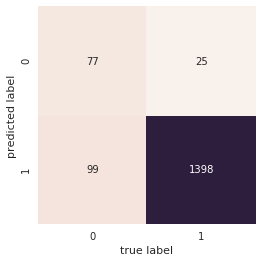

In [45]:
#Evaluating
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score 
from sklearn.metrics import precision_score, recall_score 
from sklearn.metrics import f1_score

mat = confusion_matrix(ytest, ypred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

#evaluating
print(precision_score(ytest, ypred))
print(recall_score(ytest, ypred))

#evaluating
print(precision_score(ytest, ypred))
print(recall_score(ytest, ypred))
print(f1_score(ytest, ypred))

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


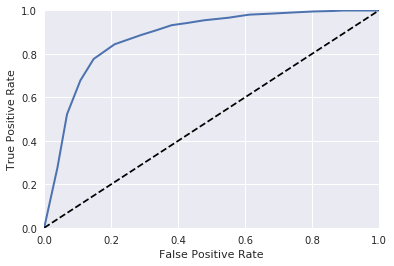

0.878250175685


In [46]:
#CURVA ROC
%matplotlib inline
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict 
from sklearn.metrics import roc_auc_score

y_probas_forest = cross_val_predict(model, Xtest, ytest, cv=3, method="predict_proba") 

y_scores_forest = y_probas_forest[:, 1]   # score = proba of positive class 
fpr_forest, tpr_forest, thresholds_forest = roc_curve(ytest, y_scores_forest)

def plot_roc_curve(fpr, tpr, label=None):    
    plt.plot(fpr, tpr, linewidth=2, label=label)    
    plt.plot([0, 1], [0, 1], 'k--')    
    plt.axis([0, 1, 0, 1])   
    plt.xlabel('False Positive Rate')    
    plt.ylabel('True Positive Rate')

plot_roc_curve(fpr_forest, tpr_forest) 
plt.show()
print(roc_auc_score(ytest, y_scores_forest))

In [47]:
#FEATURES IMPORTANCE
for name, score in zip(dados_clean.columns, model.feature_importances_):     
    print(name, score) 

LnguaPortuguesaeLiteraturaI90H 0.150705907117
LnguaPortuguesaeLiteraturaII90H 0.055135038689
MatemticaI120H 0.106463368344
MatemticaII90H 0.0437915783772
ano_letivo__ano 0.0238664697151
ano_letivo__ano_matricula_periodo 0.030916897137
qtd_pessoas_domicilio 0.027972626785
renda_bruta_familiar 0.0439069120913
descricao_area_residencial_Comunidade Indígena 1.1612193229e-07
descricao_area_residencial_Comunidade Quilombola 0.0
descricao_area_residencial_Não informado 0.0151883605487
descricao_area_residencial_Rural 0.00521728531241
descricao_area_residencial_Urbana 0.0113479412311
descricao_companhia_domiciliar_Cônjuge 0.00333248592345
descricao_companhia_domiciliar_Mãe 0.00789989374221
descricao_companhia_domiciliar_Não informado 0.000469807698332
descricao_companhia_domiciliar_Outros 0.00310579067379
descricao_companhia_domiciliar_Pai 0.00268509957501
descricao_companhia_domiciliar_Pais 0.00904309518229
descricao_companhia_domiciliar_Parente(s) ou amigo(s) 0.00471100994471
descricao_compa

In [48]:
#DECISION TREE
#Xtrain, Xtest, ytrain, ytest = train_test_split(dados_clean, y, random_state=0)
tree_clf = DecisionTreeClassifier(max_depth=3) 
tree_clf.fit(Xtrain, ytrain)
ypred = tree_clf.predict(Xtest)



0.915572232645
0.947222222222
0.958538299368
0.952846664338


/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


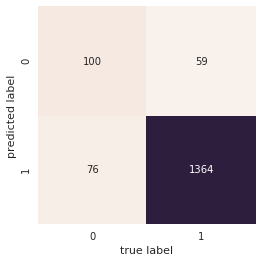

In [49]:
#porcentagem de predicao correta
n_correct = sum(ypred == ytest)    
print(n_correct / len(ypred)) 

import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

#evaluating
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, ypred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

#evaluating
from sklearn.metrics import precision_score, recall_score 
from sklearn.metrics import f1_score

print(precision_score(ytest, ypred))
print(recall_score(ytest, ypred))
print(f1_score(ytest, ypred))

In [30]:
from sklearn.tree import export_graphviz

export_graphviz(tree_clf,
                feature_names=dados_clean.columns,
                filled=True,
                rounded=True, 
                out_file='tree.dot')

import os
os.system('dot -Tpng tree.dot -o tree.png')

0

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


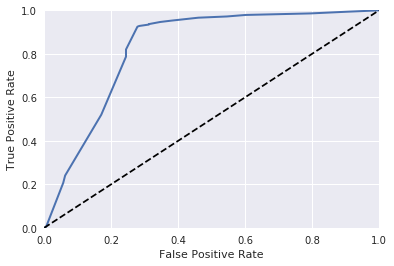

0.82921005558


In [32]:
y_probas_tree = cross_val_predict(tree_clf, Xtest, ytest, cv=3, method="predict_proba") 

y_scores_tree = y_probas_tree[:, 1]   # score = proba of positive class 
fpr_tree, tpr_tree, thresholds_tree = roc_curve(ytest, y_scores_tree)

def plot_roc_curve(fpr, tpr, label=None):    
    plt.plot(fpr, tpr, linewidth=2, label=label)    
    plt.plot([0, 1], [0, 1], 'k--')    
    plt.axis([0, 1, 0, 1])   
    plt.xlabel('False Positive Rate')    
    plt.ylabel('True Positive Rate')

plot_roc_curve(fpr_tree, tpr_tree) 
plt.show()
print(roc_auc_score(ytest, y_scores_tree))

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/legend.py:326: UserWarning: Unrecognized location "bottom right". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  six.iterkeys(self.codes))))
/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


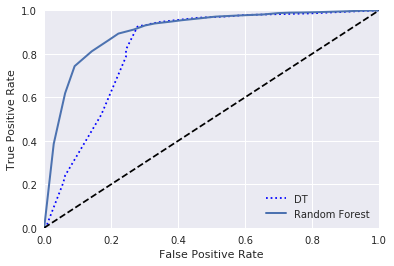

In [35]:
#PLOTAR DUAS CURVAS ROC (DT e RF)
plt.plot(fpr_tree, tpr_tree, "b:", label="DT") 
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest") 
plt.legend(loc="bottom right") 
plt.show()